In [132]:
pip install qiskit-aer


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [133]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [134]:
import numpy as np
from qiskit_aer import Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_counts

# Definizione dei coefficienti
#alpha = np.sqrt(0.9)
#beta = np.sqrt(0.1)

alpha = np.sqrt(0.3)
beta = np.sqrt(0.7)

# Creazione di un circuito quantistico con 3 qubit e 3 bit classici
c0 = ClassicalRegister(1)
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(1)
qc = QuantumCircuit(QuantumRegister(3), c0, c1, c2)

# Preparazione dello stato Alice vuole che sia teletrasportato |ψ⟩ = α|0⟩ + β|1⟩ sul primo qubit
qc.initialize([alpha, beta], 0)

qc.barrier()
qc.draw()

┌─────────────────────────────┐ ░ 
q89_0: ┤ Initialize(0.54772,0.83666) ├─░─
       └─────────────────────────────┘ ░ 
q89_1: ────────────────────────────────░─
                                       ░ 
q89_2: ────────────────────────────────░─
                                       ░ 
c31: 1/══════════════════════════════════
                                         
c32: 1/══════════════════════════════════
                                         
c33: 1/══════════════════════════════════

In [135]:
# Creazione stato entangled (Bell) tra il secondo e il terzo qubit
qc.h(1)
qc.cx(1, 2)
qc.draw()


┌─────────────────────────────┐ ░           
q89_0: ┤ Initialize(0.54772,0.83666) ├─░───────────
       └─────────────────────────────┘ ░ ┌───┐     
q89_1: ────────────────────────────────░─┤ H ├──■──
                                       ░ └───┘┌─┴─┐
q89_2: ────────────────────────────────░──────┤ X ├
                                       ░      └───┘
c31: 1/════════════════════════════════════════════
                                                   
c32: 1/════════════════════════════════════════════
                                                   
c33: 1/════════════════════════════════════════════

In [136]:
# Separiamo il qubit di Bob da quelli di Alice
qc.barrier()

qc.cx(0, 1)
qc.h(0)
qc.draw()

┌─────────────────────────────┐ ░            ░      ┌───┐
q89_0: ┤ Initialize(0.54772,0.83666) ├─░────────────░───■──┤ H ├
       └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘
q89_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├─────
                                       ░ └───┘┌─┴─┐ ░ └───┘     
q89_2: ────────────────────────────────░──────┤ X ├─░───────────
                                       ░      └───┘ ░           
c31: 1/═════════════════════════════════════════════════════════
                                                                
c32: 1/═════════════════════════════════════════════════════════
                                                                
c33: 1/═════════════════════════════════════════════════════════

In [137]:
#Alice misura i sui qubit per poter comuicare l'esito a Bob

qc.barrier()
qc.measure(0 ,c0)
qc.measure(1 ,c1)

qc.draw()

┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐   
q89_0: ┤ Initialize(0.54772,0.83666) ├─░────────────░───■──┤ H ├─░─┤M├───
       └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
q89_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├
                                       ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
q89_2: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫─
                                       ░      └───┘ ░            ░  ║  ║ 
c31: 1/═════════════════════════════════════════════════════════════╩══╬═
                                                                    0  ║ 
c32: 1/════════════════════════════════════════════════════════════════╩═
                                                                       0 
c33: 1/══════════════════════════════════════════════════════════════════

In [138]:

# Bob applica le operazioni correttive a seconda delle misure di Alice
qc.z(2).c_if(c0, 1)  # Se il primo bit misurato è 1, applicare X
qc.x(2).c_if(c1, 1)  # Se il secondo bit misurato è 1, applicare Z

qc.draw()

┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐   »
q89_0: ┤ Initialize(0.54772,0.83666) ├─░────────────░───■──┤ H ├─░─┤M├───»
       └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐»
q89_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├»
                                       ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘»
q89_2: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫─»
                                       ░      └───┘ ░            ░  ║  ║ »
c31: 1/═════════════════════════════════════════════════════════════╩══╬═»
                                                                    0  ║ »
c32: 1/════════════════════════════════════════════════════════════════╩═»
                                                                       0 »
c33: 1/══════════════════════════════════════════════════════════════════»
                                                                         »
«                     
«q89_0: ──────────────
«                     
«q89_1: ──────────────
«        ┌───┐  ┌───┐ 
«q89_2: ─┤ Z ├──┤ X ├─
«        └─╥─┘  └─╥─┘ 
«       ┌──╨──┐   ║   
«c31: 1/╡ 0x1 ╞═══╬═══
«       └─────┘┌──╨──┐
«c32: 1/═══════╡ 0x1 ╞
«              └─────┘
«c33: 1/══════════════
«

In [139]:
# Bob misura il risultato e lo memorizza nel terzo bit classico
qc.measure(2, c2)  # Misura sul terzo qubit (Bob)
qc.draw()

┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐   »
q89_0: ┤ Initialize(0.54772,0.83666) ├─░────────────░───■──┤ H ├─░─┤M├───»
       └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐»
q89_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├»
                                       ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘»
q89_2: ────────────────────────────────░──────┤ X ├─░────────────░──╫──╫─»
                                       ░      └───┘ ░            ░  ║  ║ »
c31: 1/═════════════════════════════════════════════════════════════╩══╬═»
                                                                    0  ║ »
c32: 1/════════════════════════════════════════════════════════════════╩═»
                                                                       0 »
c33: 1/══════════════════════════════════════════════════════════════════»
                                                                         »
«                        
«q89_0: ─────────────────
«                        
«q89_1: ─────────────────
«        ┌───┐  ┌───┐ ┌─┐
«q89_2: ─┤ Z ├──┤ X ├─┤M├
«        └─╥─┘  └─╥─┘ └╥┘
«       ┌──╨──┐   ║    ║ 
«c31: 1/╡ 0x1 ╞═══╬════╬═
«       └─────┘┌──╨──┐ ║ 
«c32: 1/═══════╡ 0x1 ╞═╬═
«              └─────┘ ║ 
«c33: 1/═══════════════╩═
«                      0

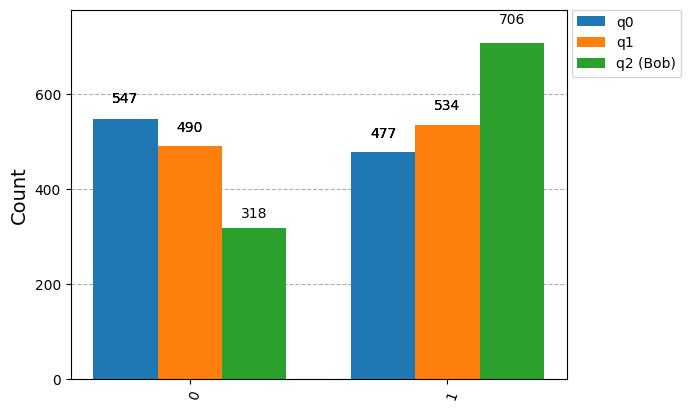

In [140]:
# Simulazione del circuito
backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, backend)
t_qc.save_statevector()
job = backend.run(t_qc)
result = job.result()
counts = result.get_counts(qc)

qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
label = ["q0", "q1", "q2 (Bob)"]

plot_histogram(qubit_counts, legend=label)